In [1]:
#  Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import io
from google.colab import files


In [13]:
## 1. Data Upload
#Upload the Excel file containing asset price data.


In [5]:
# Upload Excel file
uploaded = files.upload()
filename = next(iter(uploaded))  # Automatically fetch the uploaded filename


Saving data set on prices of assets.xlsx to data set on prices of assets.xlsx


In [ ]:
## 2. Data Loading & Cleaning
#Load the dataset, remove unnamed columns, and sort by date.


In [6]:
df = pd.read_excel(io.BytesIO(uploaded[filename]), parse_dates=['Date'])
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)


In [ ]:
##  3. Exploratory Data Analysis (EDA)
#Inspect structure, missing values, and statistics.


In [7]:
print("DATA INFO:")
print(df.info())

print("\nMISSING VALUE CHECK:")
print(df.isnull().sum())

print("\nDESCRIPTIVE STATISTICS:")
print(df.describe())


DATA INFO:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3741 entries, 2010-05-31 to NaT
Data columns (total 11 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   KYD Deposit Index                         3625 non-null   float64
 1   KYD Eurobond Index                        3625 non-null   float64
 2   KYD Short-Term Government Eurobond Index  3625 non-null   float64
 3   KYD Short-Term Bond Index                 3625 non-null   float64
 4   KYD Deposit Index (1 Month)               3625 non-null   float64
 5   KYD Long-Term Bond Index                  3625 non-null   float64
 6   BIST 100 Index                            3625 non-null   float64
 7   S&P 500 Total Return Index                3625 non-null   float64
 8   Gold Ounce/USD Rate                       3625 non-null   float64
 9   US 10-Year Bond Index                     3625 non-null   float64
 10  USD/TRY Exchan

In [12]:
## 4. Visual Exploration
# Correlation heatmap and time series plots.


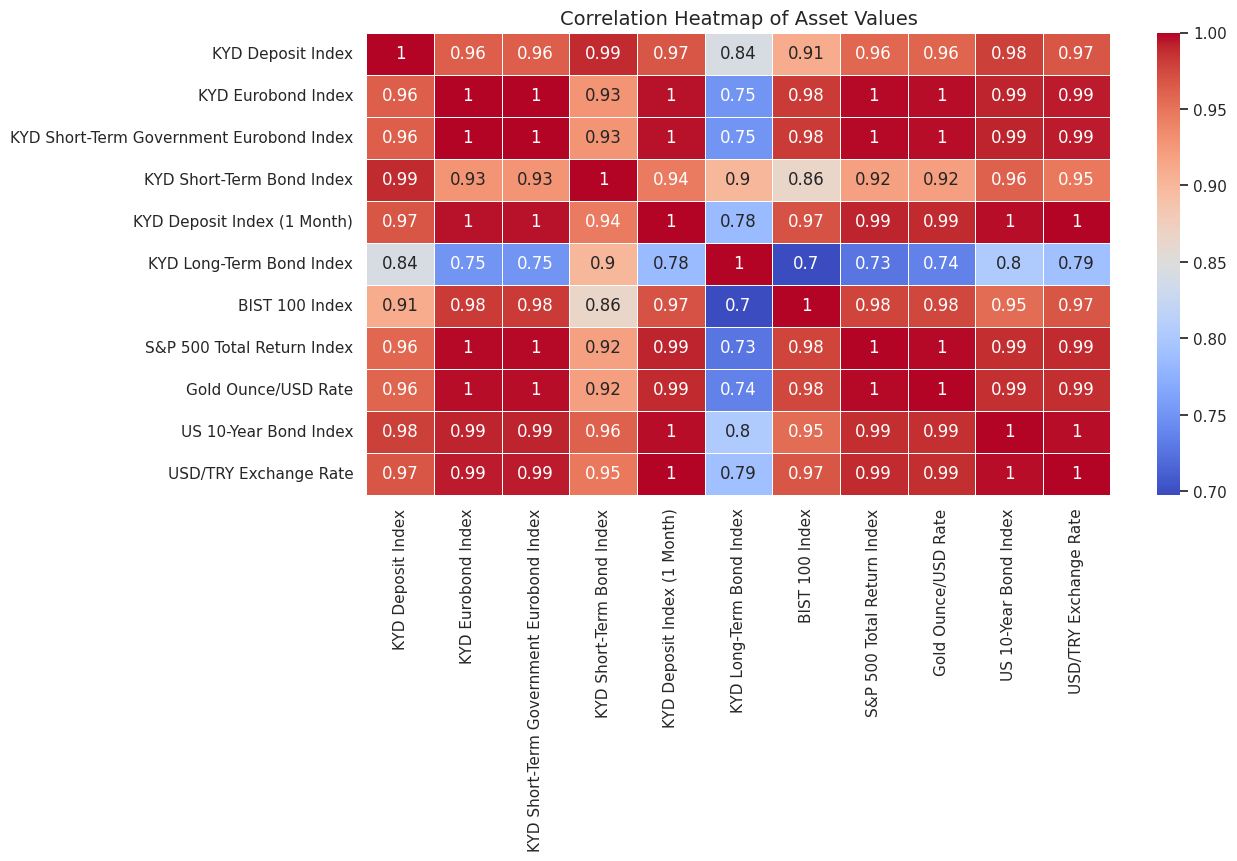

<Figure size 1400x600 with 0 Axes>

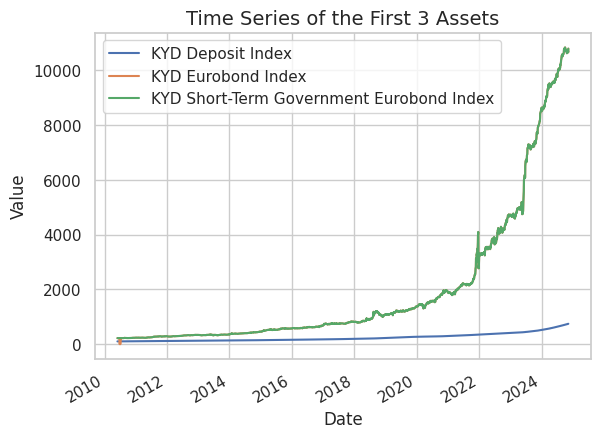

In [9]:
# Correlation heatmap
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Asset Values", fontsize=14)
plt.show()

# Time series for first 3 assets
plt.figure(figsize=(14, 6))
df.iloc[:, :3].plot()
plt.title("Time Series of the First 3 Assets", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Value")
plt.grid(True)
plt.legend(loc="upper left")
plt.show()


In [11]:
## 5. Hypothesis Testing
#Testing if the mean daily return of the first asset is significantly different from 0.


In [10]:
# Calculate daily returns (warning-free)
returns = df.iloc[:, 0].pct_change(fill_method=None).dropna()

# One-sample t-test
t_stat, p_val = stats.ttest_1samp(returns, 0)

# Results
print(f"\nHYPOTHESIS TEST RESULT for: {df.columns[0]}")
print(f"T-statistic: {t_stat:.4f}, P-value: {p_val:.4f}")
if p_val < 0.05:
    print("✅ The mean daily return is statistically significantly different from zero (p < 0.05).")
else:
    print("❌ The mean daily return is NOT statistically significantly different from zero (p ≥ 0.05).")



HYPOTHESIS TEST RESULT for: KYD Deposit Index
T-statistic: 60.1129, P-value: 0.0000
✅ The mean daily return is statistically significantly different from zero (p < 0.05).


In [15]:
## 6. Refined Hypothesis: Portfolio vs. Benchmark
#We create a portfolio consisting of KYD Eurobond, BIST 100, and Gold. We then compare its mean return to the 1-month KYD Deposit Index to test if the portfolio performs better than a risk-free benchmark.


In [17]:
# Create portfolio from 3 assets
portfolio = df[["KYD Eurobond Index", "BIST 100 Index", "Gold Ounce/USD Rate"]].mean(axis=1)

# Calculate daily returns
portfolio_returns = portfolio.pct_change(fill_method=None).dropna()
benchmark_returns = df["KYD Deposit Index (1 Month)"].pct_change(fill_method=None).dropna()

# Align both return series
combined = pd.DataFrame({
    "Portfolio": portfolio_returns,
    "Benchmark": benchmark_returns
}).dropna()

# Paired t-test: Portfolio vs Benchmark
t_stat, p_val = stats.ttest_rel(combined["Portfolio"], combined["Benchmark"])

# Display results
print("\nREFINED HYPOTHESIS TEST: Portfolio vs. Benchmark")
print(f"T-statistic: {t_stat:.4f}, P-value: {p_val:.4f}")
if p_val < 0.05:
    print("✅ Portfolio mean return is significantly greater than the benchmark (p < 0.05).")
else:
    print("❌ No significant difference in returns (p ≥ 0.05).")



REFINED HYPOTHESIS TEST: Portfolio vs. Benchmark
T-statistic: 0.8071, P-value: 0.4197
❌ No significant difference in returns (p ≥ 0.05).


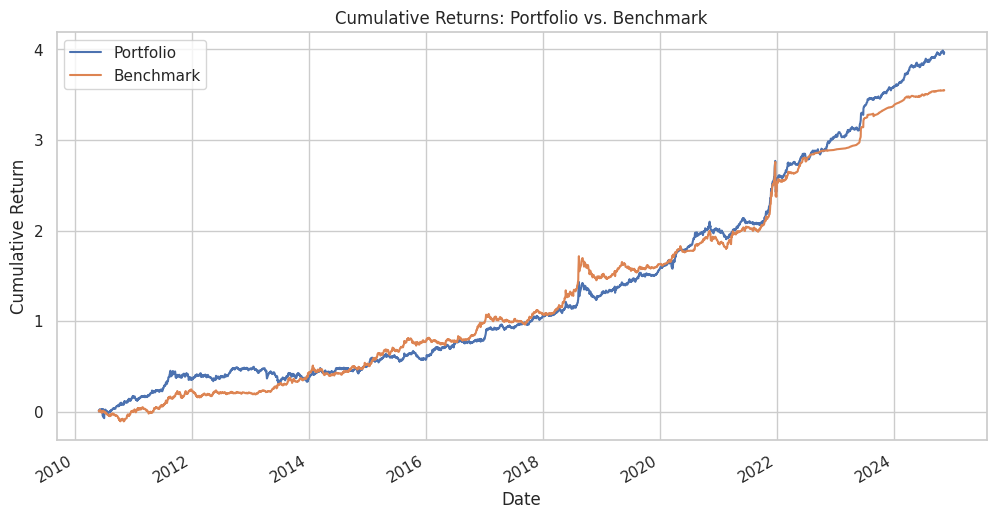

In [18]:
combined.cumsum().plot(figsize=(12,6), title="Cumulative Returns: Portfolio vs. Benchmark")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.grid(True)
plt.show()
